# Practica 10 : Word Cloud

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

## Lectura del Archivo CSV

In [2]:
df = pd.read_csv('../Data-Treated/fixed_data_who_suicide.csv')

## Generador de WordCloud
### El tamaño del pais depende de la cantidad de suicidios en ese pais

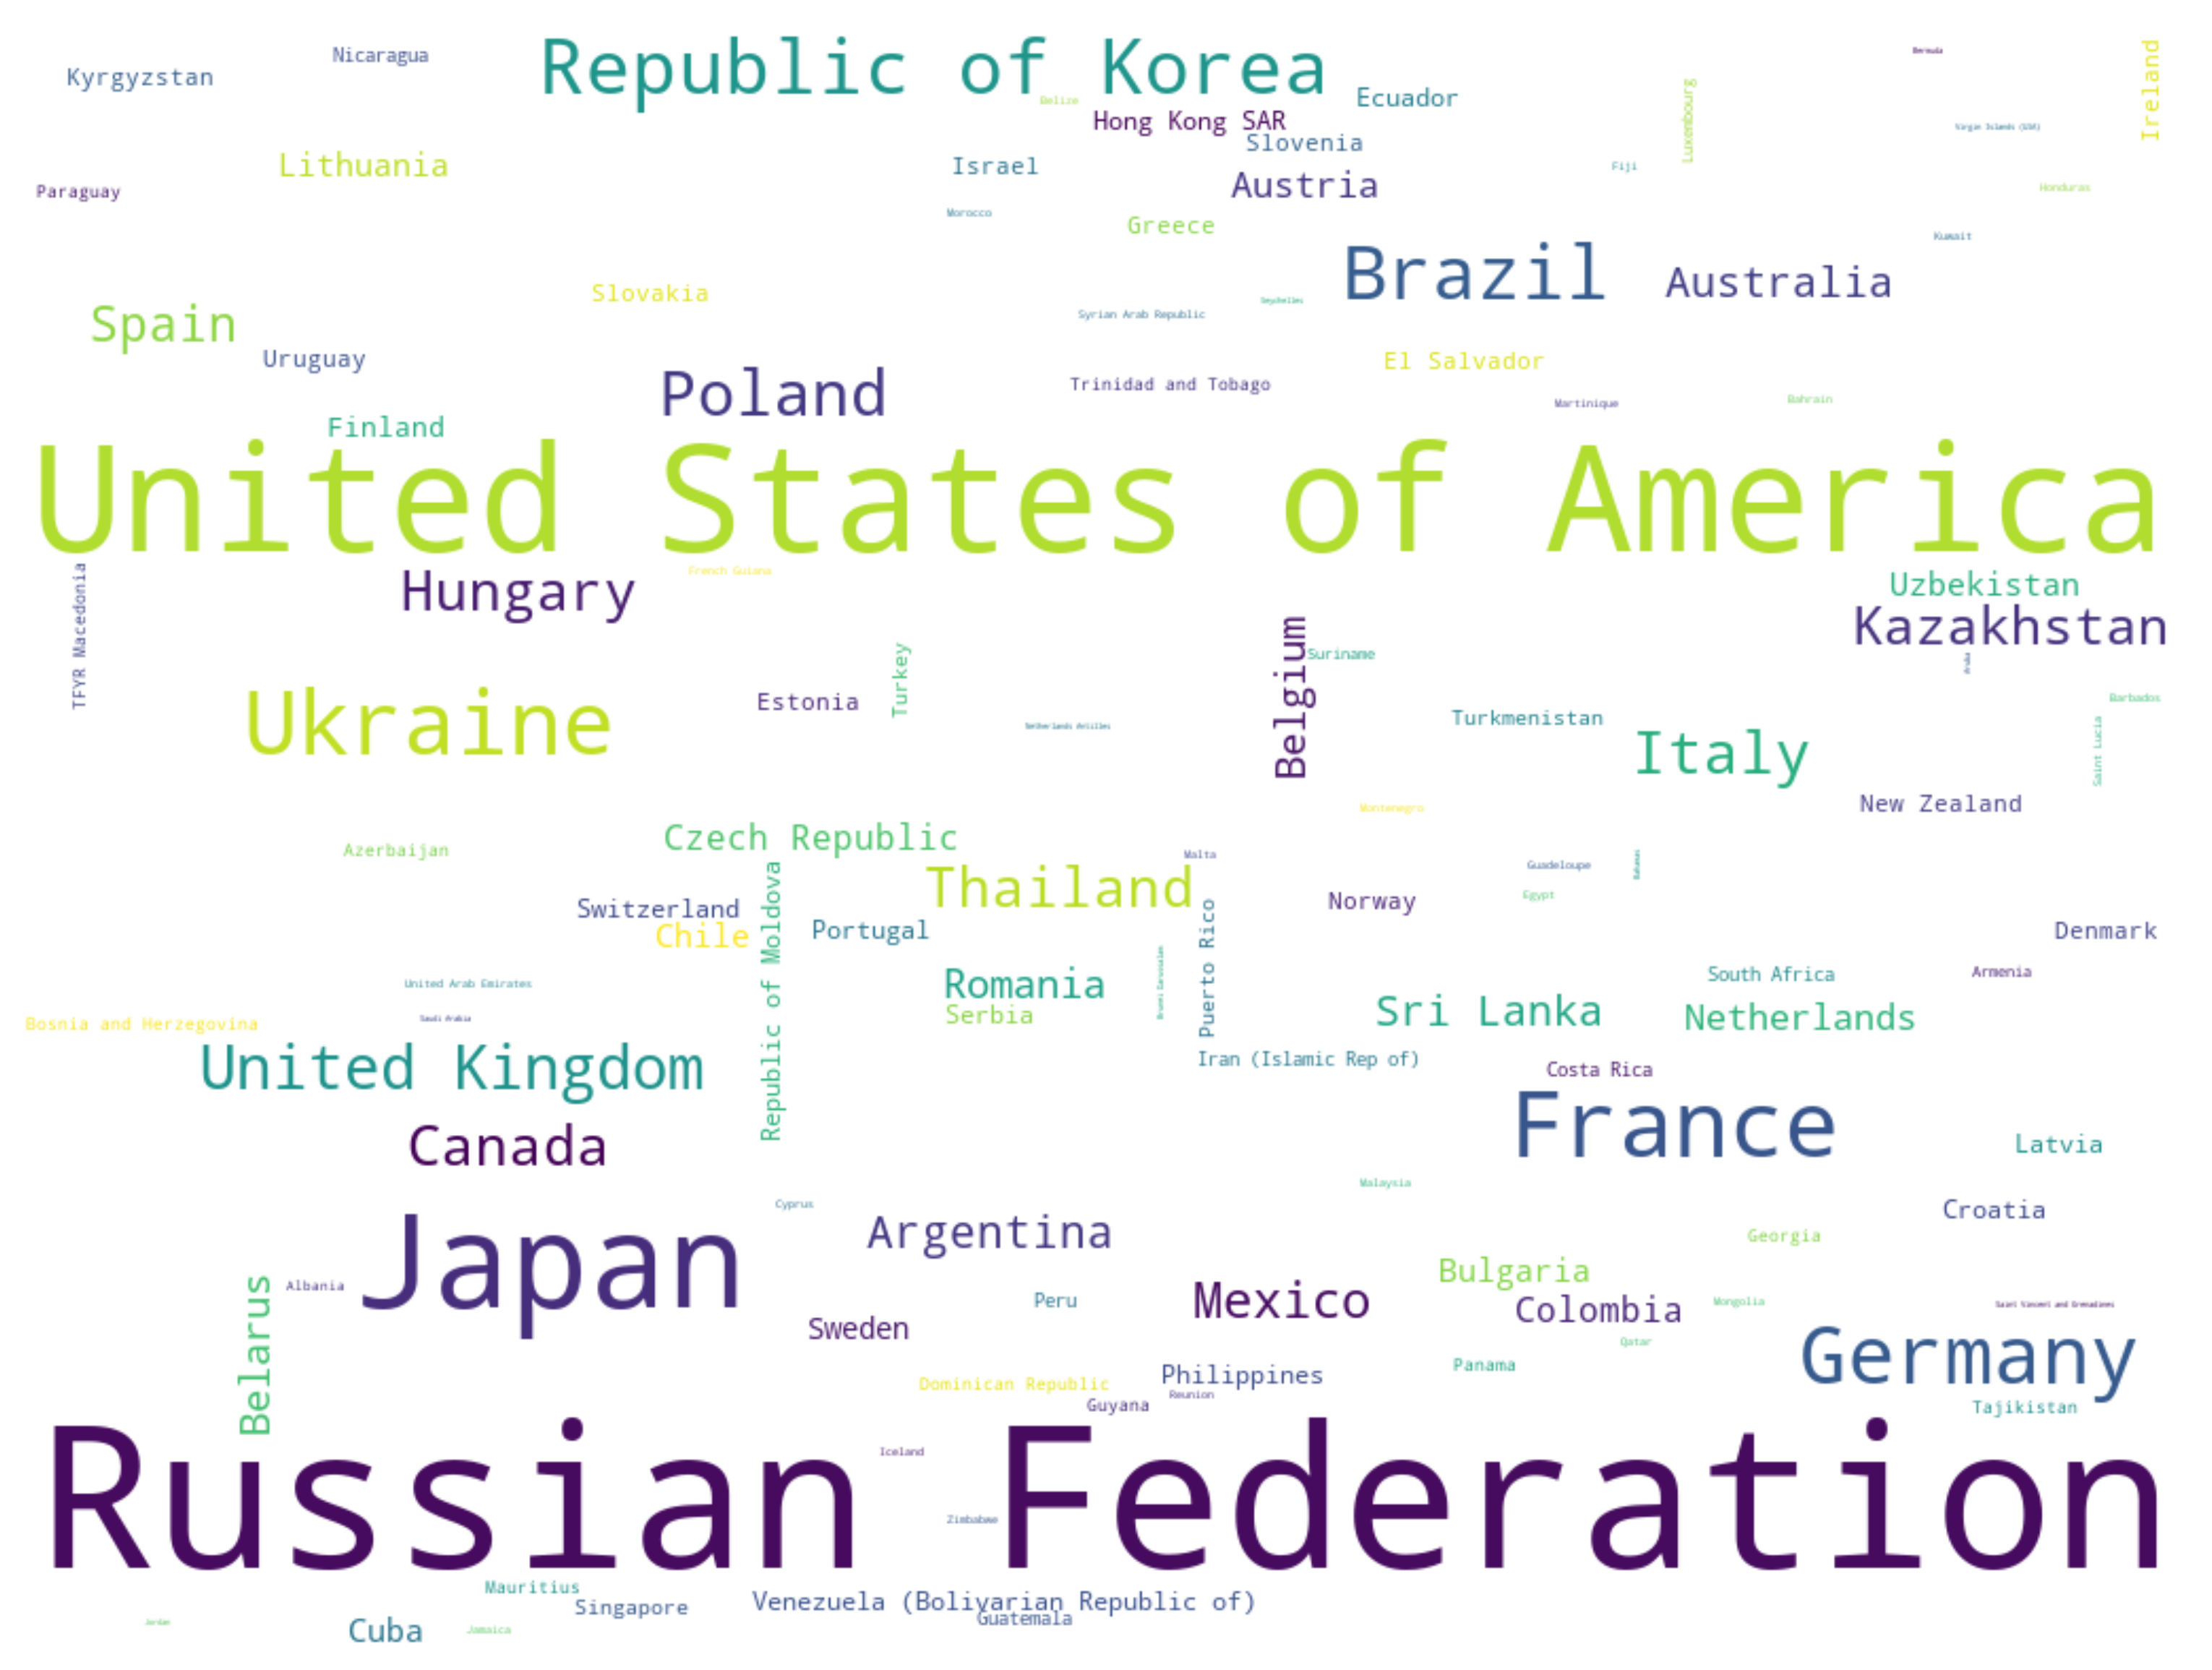

In [3]:
# Ahora, agrupa por 'paises' y 'cantidad de suicidios' y suma los valores
resultado = df.groupby(['country'], as_index=False)['suicides_no'].sum()

dict_suicides = dict(zip(resultado['country'], resultado['suicides_no']))

wordcloud = WordCloud(
    background_color="white",
    width=1024,
    height=768,
    max_font_size=100
).generate_from_frequencies(dict_suicides)

plt.figure(figsize=(10, 10), facecolor=None, dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('../WordCloud/word_cloud.png', format='png', bbox_inches='tight', pad_inches=0, dpi=600)

plt.show()